## **Recurrent Neural Network (RNN)**

RNNs are a type of neural network that can be used to model sequence data. RNNs, which are formed from feedforward networks, are similar to human brains in their behaviour. Simply said, recurrent neural networks can anticipate sequential data in a way that other algorithms can’t.

All of the inputs and outputs in standard neural networks are independent of one another, however in some circumstances, such as when predicting the next word of a phrase, the prior words are necessary, and so the previous words must be remembered. As a result, RNN was created, which used a Hidden Layer to overcome the problem. The most important component of RNN is the Hidden state, which remembers specific information about a sequence.

RNNs have a Memory that stores all information about the calculations. It employs the same settings for each input since it produces the same outcome by performing the same task on all inputs or hidden layers.

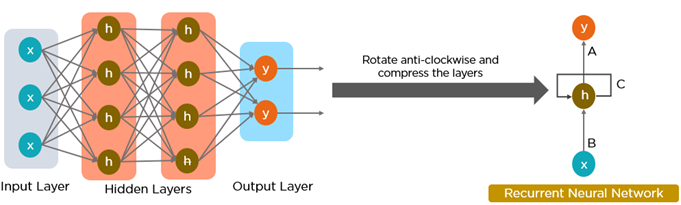

The input layer x receives and processes the neural network’s input before passing it on to the middle layer.

Multiple hidden layers can be found in the middle layer h, each with its own activation functions, weights, and biases. You can utilize a recurrent neural network if the various parameters of different hidden layers are not impacted by the preceding layer, i.e. There is no memory in the neural network.

The different activation functions, weights, and biases will be standardized by the Recurrent Neural Network, ensuring that each hidden layer has the same characteristics. Rather than constructing numerous hidden layers, it will create only one and loop over it as many times as necessary.

**Recurrent Neural Network Vs Feedforward Neural Network**

A feed-forward neural network has only one route of information flow: from the input layer to the output layer, passing through the hidden layers. The data flows across the network in a straight route, never going through the same node twice.

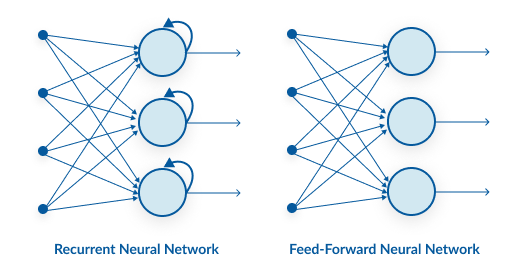

A function’s slope is also known as its gradient. The steeper the slope, the faster a model can learn, the higher the gradient. The model, on the other hand, will stop learning if the slope is zero. A gradient is used to measure the change in all weights in relation to the change in error.

Exploding Gradients: Exploding gradients occur when the algorithm gives the 
weights an absurdly high priority for no apparent reason. Fortunately, truncating or squashing the gradients is a simple solution to this problem.

Vanishing Gradients: Vanishing gradients occur when the gradient values are too small, causing the model to stop learning or take far too long. This was a big issue in the 1990s, and it was far more difficult to address than the exploding gradients. Fortunately, Sepp Hochreiter and Juergen Schmidhuber’s LSTM concept solved the problem.

**Long Short Term Memory (LSTM)**

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network can process not only single data points (such as images), but also entire sequences of data (such as speech or video).

**Working of LSTM**

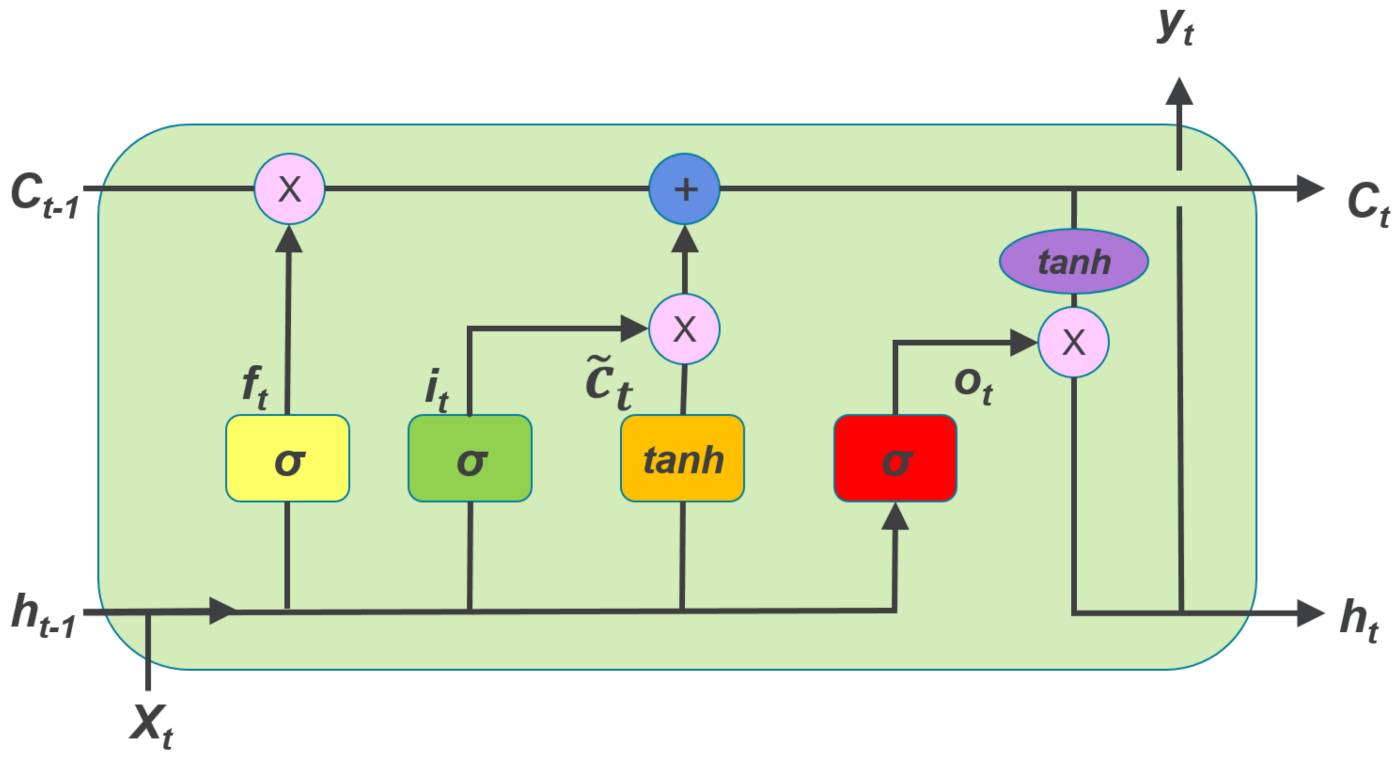

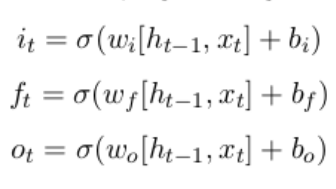 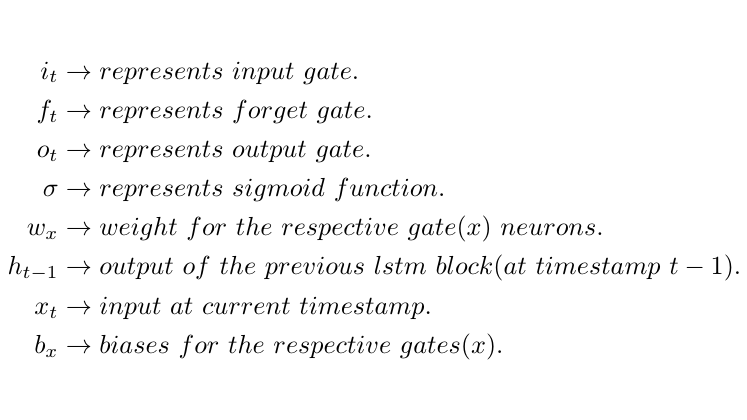

First equation is for Input Gate which tells us that what new information we’re going to store in the cell state(that we will see below).

Second is for the forget gate which tells the information to throw away from the cell state.

Third one is for the output gate which is used to provide the activation to the final output of the lstm block at timestamp ‘t’.

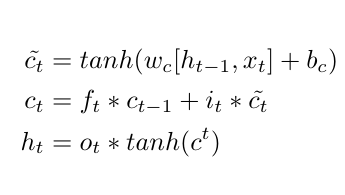 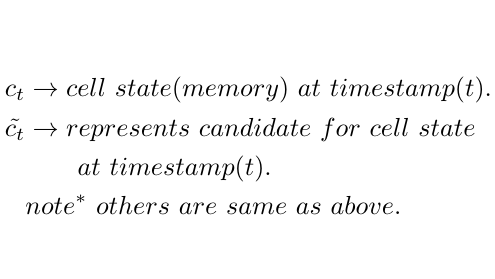

# **Using RNN in Stock Market Prediction Model**

**Importing Dependencies**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Collection**

In [ ]:
path_of_file = '/content/drive/MyDrive/Google Collab Files/Internship/hpq.us.txt'
df = pd.read_csv(path_of_file,delimiter=',',
                usecols=['Date','Open','High','Low','Close'])

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


In [ ]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


**Data Anaysis**

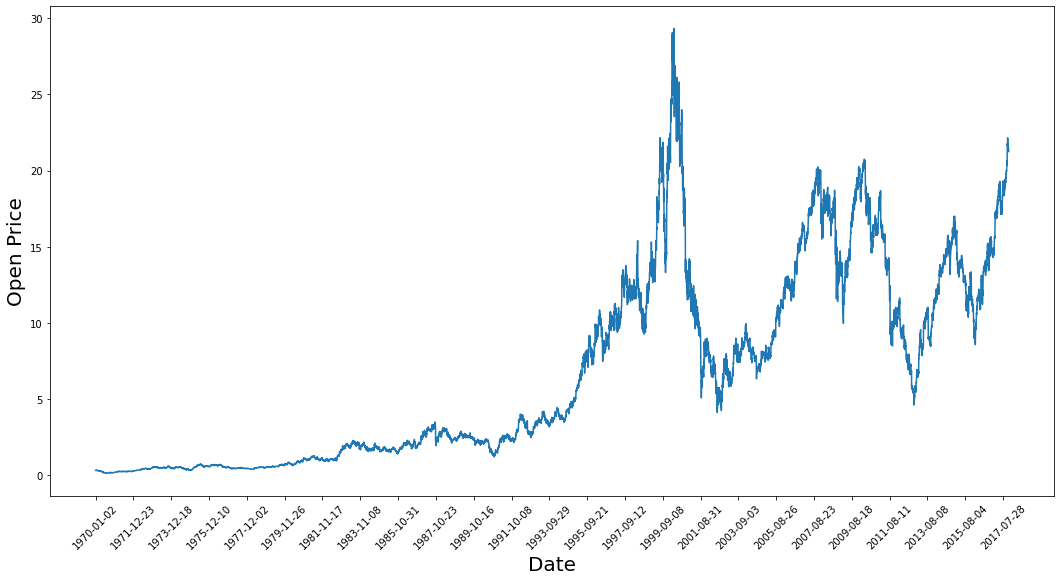

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Open Price',fontsize=20)
plt.show()

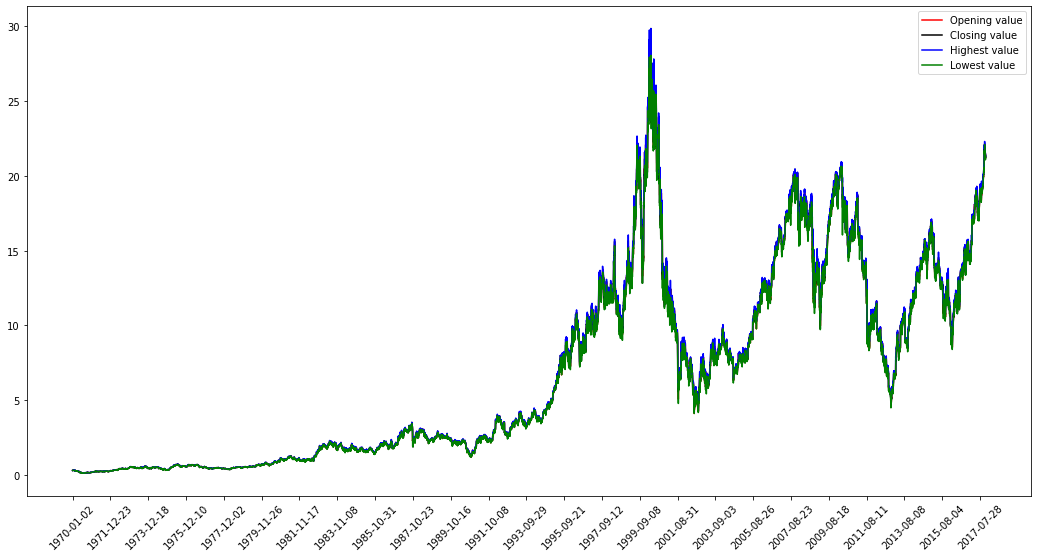

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'],color='red',label='Opening value')
plt.plot(range(df.shape[0]),df['Close'],color='black',label='Closing value')
plt.plot(range(df.shape[0]),df['High'],color='blue',label='Highest value')
plt.plot(range(df.shape[0]),df['Low'],color='green',label='Lowest value')
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.legend()
plt.show()

**Importing Model Dependencies**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

**Data Preprocessing & creating Training - Testing Data**

In [ ]:
D = df.iloc[:,1:2].values

In [ ]:
D.shape

(12075, 1)

In [ ]:
Tr_set = D[:10000]    #we shouldn't shuffle data otherwise it will loose the sequence. Since, each price is dependent on previous price.
Ts_set = D[10000:]

In [ ]:
Tr_set.shape

(10000, 1)

In [ ]:
Ts_set.shape

(2075, 1)

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))    #noramalization of the data

In [ ]:
Tr_scaled = sc.fit_transform(Tr_set)
Ts_scaled = sc.transform(Ts_set)

In [ ]:
#creating sequential time steps
seq_len = 100
X_train = []
y_train = []
for i in range(seq_len,len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i,0])
    y_train.append(Tr_scaled[i,0])

In [ ]:
X_train[0]

array([0.00642261, 0.00642261, 0.00668211, 0.00668211, 0.00668211,
       0.00668211, 0.00681323, 0.00707548, 0.0069447 , 0.0069447 ,
       0.00720626, 0.00707548, 0.0069447 , 0.00720626, 0.00720626,
       0.00707548, 0.0069447 , 0.00681323, 0.00654893, 0.00642261,
       0.00628806, 0.00616002, 0.00616002, 0.00616002, 0.00589812,
       0.0057646 , 0.00628806, 0.00616002, 0.00616002, 0.00628806,
       0.00628806, 0.00642261, 0.00654893, 0.00654893, 0.00654893,
       0.00589812, 0.00589812, 0.00602547, 0.00602547, 0.00602547,
       0.00616002, 0.00563382, 0.00563382, 0.0057646 , 0.00563382,
       0.00550372, 0.00524353, 0.00537294, 0.00537294, 0.00524353,
       0.00524353, 0.00524353, 0.00550372, 0.00537294, 0.00524353,
       0.00524353, 0.00498094, 0.00498094, 0.00510933, 0.00510933,
       0.00498094, 0.00498094, 0.00524353, 0.00524353, 0.00510933,
       0.00445337, 0.00432636, 0.00445337, 0.00445337, 0.0047187 ,
       0.0047187 , 0.0047187 , 0.00458655, 0.0041901 , 0.00419

In [ ]:
type(X_train)

list

In [ ]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
len(X_train[0])

100

In [ ]:
y_train[0]

0.0014430320722864922

In [ ]:
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])

In [ ]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [ ]:
X_train.shape

(9800, 100)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(9800, 100, 1)

In [ ]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_test.shape

(1875, 100, 1)

**Data Modelling**

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,                 #creating first hidden layer with 50 inputs from time steps
              input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=False))               #creating second hidden layer with other 50 inputs from remaining of time steps
#model.add(Dropout(0.2))
#model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [ ]:
#fitting the data into model
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
307/307 [==============================] - 12s 10ms/step - loss: 0.0021
Epoch 2/5
307/307 [==============================] - 3s 9ms/step - loss: 6.8244e-04
Epoch 3/5
307/307 [==============================] - 3s 9ms/step - loss: 6.0202e-04
Epoch 4/5
307/307 [==============================] - 3s 9ms/step - loss: 5.3381e-04
Epoch 5/5
307/307 [==============================] - 3s 9ms/step - loss: 5.1706e-04


In [ ]:
y_hat = model.predict(X_test)

In [ ]:
y_hat.shape

(1875, 1)

**Data Visualization**

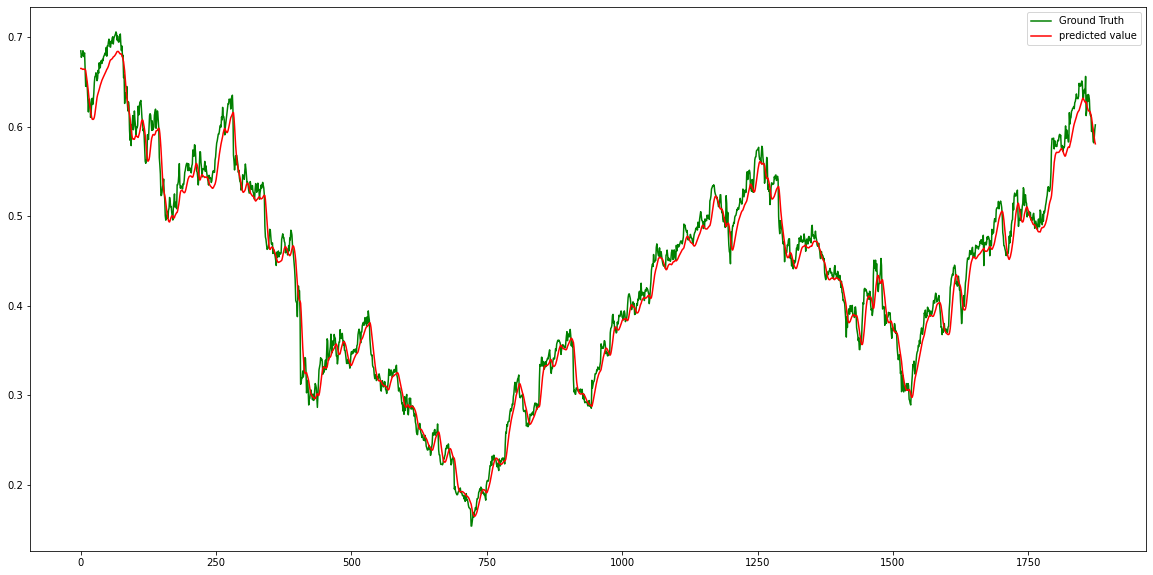

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='green',label='Ground Truth')
plt.plot(y_hat,color='red',label='predicted value')
plt.legend()
plt.show()

**Conclusion**

Similarly, we can predict the price of stocks for upcoming dates. The Recurrent Neural Network, we are using here, is giving very exact prediction, as we can compare this from above plot.